In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [6]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [7]:
dependent=dataset[['charges']]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="absolute_error",splitter="best",max_features='log2')
regressor=regressor.fit(X_train,y_train)

In [10]:
y_pred=regressor.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7340980979084448

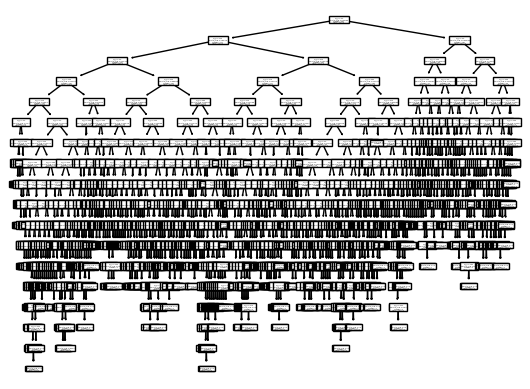

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [18]:
import pickle
filename="FinalModel_DTR.sav"
pickle.dump(regressor,open(filename,'wb'))

In [19]:
load_model=pickle.load(open("FinalModel_DTR.sav",'rb'))
age=float(input("age: "))
sex=float(input("sex 0 or 1: "))
bmi=float(input("bmi: "))
children=int(input("children:"))
smoker=int(input("smoker 0 or 1:"))

age: 28
sex 0 or 1: 0
bmi: 26.3
children:1
smoker 0 or 1:1


In [20]:
result=regressor.predict([[age,sex,bmi,children,smoker]])
result

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([17663.])